In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inli  ne
import seaborn as sns

In [3]:
import os 
os.getcwd()
os.chdir('/Users/pulkit/Desktop/python/titanic')

In [4]:
df= pd.read_csv('train.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

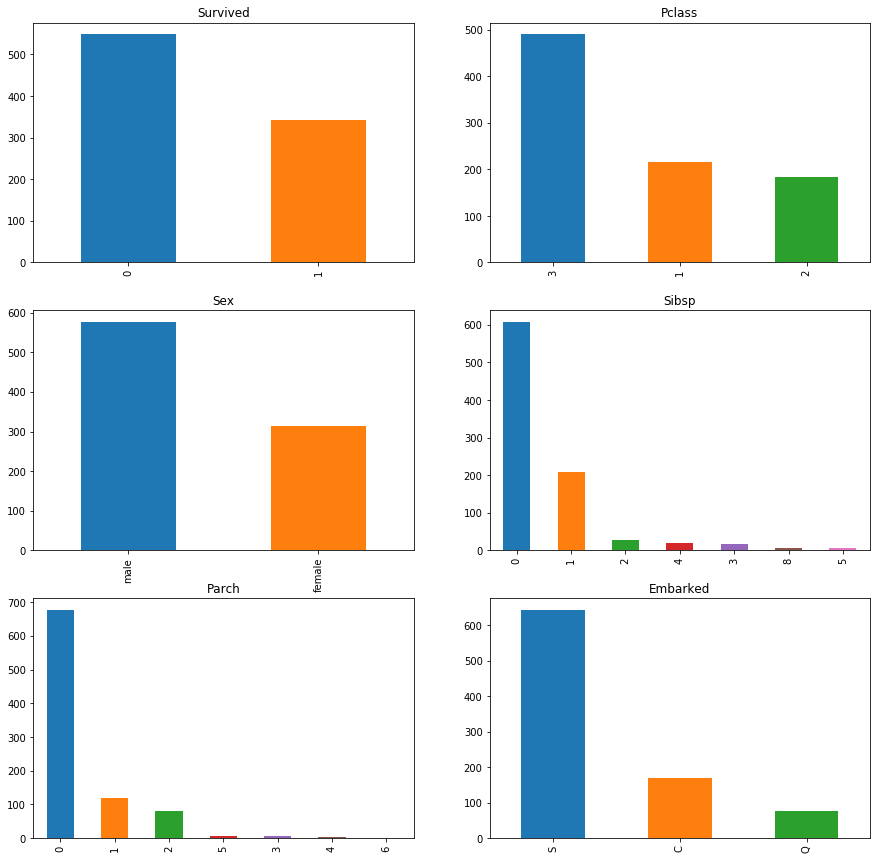

In [9]:
plt.figure()
plt.subplot(321)
df['Survived'].value_counts().plot.bar(figsize= (15,15), title= 'Survived')
plt.subplot(322)
df['Pclass'].value_counts().plot.bar( title= 'Pclass')
plt.subplot(323)
df['Sex'].value_counts().plot.bar( title= 'Sex')
plt.subplot(324)
df['SibSp'].value_counts().plot.bar(title= 'Sibsp')
plt.subplot(325)
df['Parch'].value_counts().plot.bar(title= 'Parch')
plt.subplot(326)
df['Embarked'].value_counts().plot.bar(title= 'Embarked')
plt.show()


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


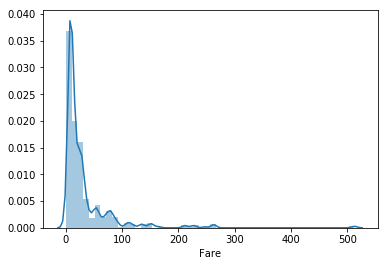

In [10]:
sns.distplot(df['Fare'])

In [11]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [12]:
bins= [0,50,100,513]

df['Fare_bins']= pd.cut(df['Fare'],bins)

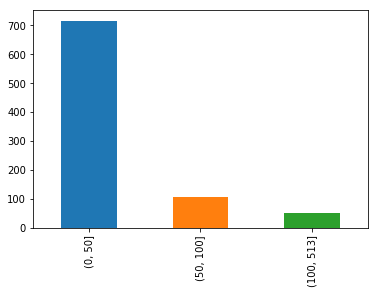

In [13]:
df['Fare_bins'].value_counts().plot.bar()

In [14]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


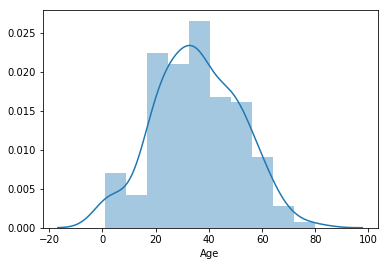

In [15]:
df1= df.dropna()
sns.distplot(df1['Age'])

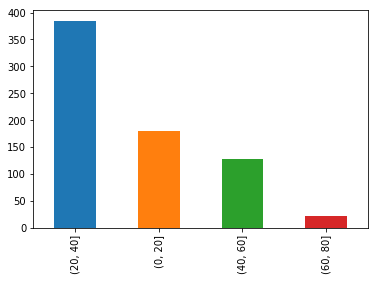

In [16]:
bin= [0,20,40,60,80]
df['Age_bins']= pd.cut(df['Age'], bin)
df['Age_bins'].value_counts().plot.bar()

In [17]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Fare_bins',
       'Age_bins'],
      dtype='object')

In [19]:
fare = pd.crosstab(df['Fare_bins'],df['Survived'])
sex= pd.crosstab(df['Sex'], df['Survived'])
pclass= pd.crosstab(df['Pclass'],df['Survived'])
sibsp= pd.crosstab(df['SibSp'],df['Survived'])
Parch= pd.crosstab(df['Parch'],df['Survived'])
age= pd.crosstab(df['Age_bins'],df['Survived'])
embarked= pd.crosstab(df['Embarked'],df['Survived'])

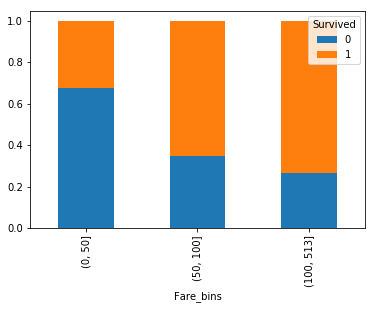

In [20]:
fare.div(fare.sum(1), axis=0).plot(kind='bar', stacked=True)

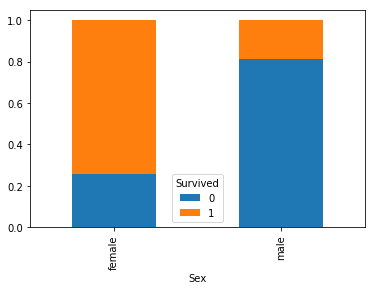

In [21]:
sex.div(sex.sum(1), axis=0).plot(kind='bar', stacked=True)

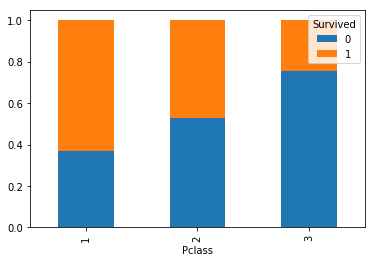

In [22]:
pclass.div(pclass.sum(1), axis=0).plot(kind='bar', stacked=True)

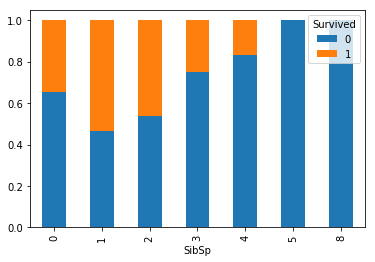

In [23]:
sibsp.div(sibsp.sum(1), axis=0).plot(kind='bar', stacked=True)

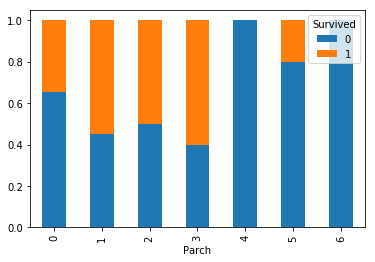

In [24]:
Parch.div(Parch.sum(1), axis=0).plot(kind='bar', stacked=True)

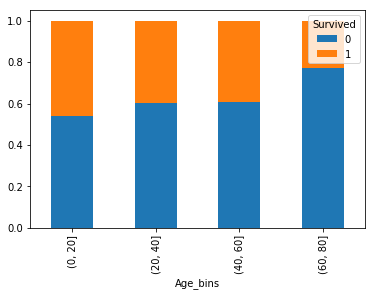

In [25]:
age.div(age.sum(1), axis=0).plot(kind='bar', stacked=True)

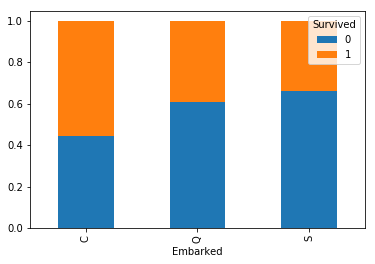

In [26]:
embarked.div(embarked.sum(1), axis=0).plot(kind='bar', stacked=True)

In [27]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [28]:
#filling missing Values

In [29]:
df['Age'].fillna(df['Age'].mean(), inplace= True)
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [56]:
x= df.drop(['Survived', 'Name','Ticket','Fare_bins', 'Age_bins'], 1)
y= df['Survived']

In [147]:
x= pd.get_dummies(x)
x.loc[1:3]


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A14,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
1,2,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [113]:
#model building 

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import xgboost
from xgboost import XGBClassifier

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [ ]:
#Using Logistic Regression

In [64]:
clf= LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
confusion_matrix(y_test, y_pred)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[146,  20],
       [ 33,  69]])

In [ ]:
#Using Decision Tree

In [69]:
clf2= tree.DecisionTreeClassifier()
clf2.fit(x_train, y_train)
y_pred2 = clf2.predict(x_test)
confusion_matrix(y_test, y_pred2)

array([[140,  26],
       [ 37,  65]])

In [132]:
# USing Support Vector Mechanics

In [74]:
clf3= SVC()
clf3.fit(x_train, y_train)
y_pred3 = clf3.predict(x_test)
confusion_matrix(y_test, y_pred3)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[145,  21],
       [ 85,  17]])

In [136]:
#Random Forest

In [80]:
clf4= RandomForestClassifier()
clf4.fit(x_train, y_train)
y_pred4 = clf4.predict(x_test)
confusion_matrix(y_test, y_pred4)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[159,   7],
       [ 40,  62]])

In [149]:
# XG Boost

In [155]:
!pip install xgboost

    100% |████████████████████████████████| 645kB 6.5MB/s ta 0:00:01
  Running setup.py bdist_wheel for xgboost ... done
  Stored in directory: /Users/pulkit/Library/Caches/pip/wheels/8a/89/0c/4870bb69132698f40889fa956f92e630a36c1fd7173fcc759f
Successfully built xgboost


In [160]:
import xgboost
from xgboost import XGBClassifier

kf= StratifiedKFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(x,y):
    x_train, x_test= x.loc[train_index], x.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model= XGBClassifier()
    model.fit(x_train, y_train)
    y_pred= model.predict(x_test)
    print("accuracy score is" + str(accuracy_score(y_pred, y_test)))

accuracy score is0.7821229050279329
accuracy score is0.8156424581005587
accuracy score is0.848314606741573
accuracy score is0.8258426966292135
accuracy score is0.807909604519774


In [ ]:
#k Fold validation

In [134]:

i=1
kf = StratifiedKFold(n_splits=5, shuffle= True)

for train_index, test_index in kf.split(x,y):
    print('{} of Kfold {}'.format(i, kf.n_splits))
    x_train, x_test= x.loc[train_index], x.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    clf= LogisticRegression()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print("accuracy score is:" + str(accuracy_score(y_test, y_pred)))
    i+=1

1 of Kfold 5
accuracy score is:0.7877094972067039
2 of Kfold 5
accuracy score is:0.7653631284916201
3 of Kfold 5
accuracy score is:0.8314606741573034
4 of Kfold 5
accuracy score is:0.8202247191011236
5 of Kfold 5
accuracy score is:0.7853107344632768


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur